# (02) Daniel

**Motivation**: save raw data (both bold & ca) as matlab files. <br>

In [1]:
import os, sys
import numpy as np
from os.path import join as pjoin
from matplotlib import pyplot as plt

In [ ]:
path = '/home/hadi/Desktop/Hadi-SLC'

## Load dictionary (node info)

In [13]:
lookup = np.load(
    pjoin(path, 'roi_lookup.npy'),
    allow_pickle=True,
).item()

print(list(lookup))

['ca2', 'bold']

In [18]:
print(f"Num BOLD ROIs: {len(lookup['bold'])},\tNum CA2 ROIs: {len(lookup['ca2'])}")

Num BOLD ROIs: 1438,    Num CA2 ROIs: 226

In [21]:
brain = np.load(pjoin(path, 'brain_100um.npy'))
brain.shape

(132, 80, 114)

In [26]:
regions = np.unique(brain[brain != 0])
len(regions)

1454

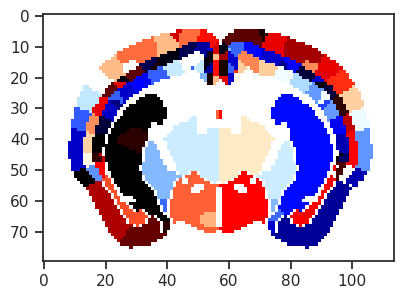

In [35]:
x = brain[60].copy().astype(float)
x[x == 0] = np.nan

plt.imshow(x, cmap='flag_r')
plt.show()

## From vector to 3d NII file

In [44]:
x = np.load(pjoin(path, 'example.npy'))
data_3d = np.zeros(brain.shape, dtype=float)

In [47]:
kk = 0

for node, region_id in lookup['bold'].items():
    mask = brain == region_id
    data_3d[mask] = x[kk, node]

### Plot a coronal to see if looks good

<matplotlib.image.AxesImage object at 0x7f0d55715790>

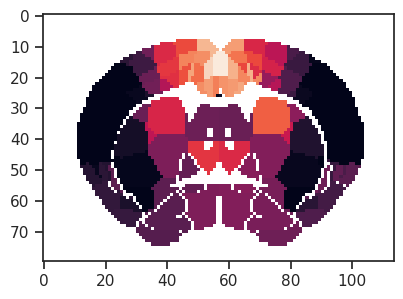

In [68]:
slice_i = 52
data2plot = data_3d[slice_i].copy()
data2plot[brain[slice_i] == 0] = np.nan
plt.imshow(data2plot, vmin=0.1)

### Save as nii

In [70]:
import ants

img = ants.from_numpy(data_3d)
img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [73]:
ants.image_write(img, pjoin(path, 'example.nii'))